In [1]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn import datasets
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
iris = datasets.load_iris()

In [4]:
dir(iris)

['DESCR', 'data', 'feature_names', 'filename', 'target', 'target_names']

In [5]:
iris.data

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [6]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [8]:
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [9]:
df.drop(['petal length (cm)','petal width (cm)'], axis = 1)

,sepal length (cm),sepal width (cm)
0,5.1,3.5
1,4.9,3.0
2,4.7,3.2
3,4.6,3.1
4,5.0,3.6
...,...,...
145,6.7,3.0
146,6.3,2.5
147,6.5,3.0
148,6.2,3.4


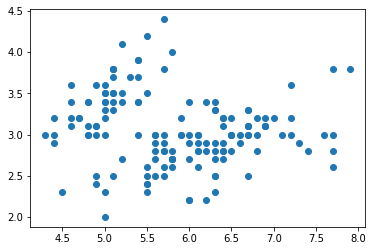

In [10]:
plt.scatter(df['sepal length (cm)'], df['sepal width (cm)'])


In [12]:
from sklearn.cluster import KMeans

In [19]:
km = KMeans(n_clusters=3)
km

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [34]:
y_pred = km.fit_predict(df[['sepal length (cm)', 'sepal width (cm)']])
y_pred

array([7, 0, 0, 0, 7, 3, 0, 7, 0, 0, 7, 0, 0, 0, 3, 3, 3, 7, 3, 7, 7, 7,
       0, 7, 0, 0, 7, 7, 7, 0, 0, 7, 3, 3, 0, 0, 7, 7, 0, 7, 7, 6, 0, 7,
       7, 0, 7, 0, 7, 7, 1, 1, 1, 6, 4, 2, 1, 6, 1, 6, 6, 2, 4, 4, 2, 1,
       2, 2, 4, 2, 2, 4, 4, 4, 4, 1, 1, 1, 2, 2, 2, 2, 2, 4, 2, 1, 1, 4,
       2, 2, 2, 4, 2, 6, 2, 2, 2, 4, 6, 2, 1, 2, 5, 4, 1, 5, 6, 5, 4, 5,
       1, 4, 1, 2, 2, 1, 1, 5, 5, 4, 1, 2, 5, 4, 1, 5, 4, 4, 4, 5, 5, 5,
       4, 4, 4, 5, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 4, 1, 1, 2], dtype=int32)

In [35]:
df['cluster'] = y_pred

In [36]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),cluster
0,5.1,3.5,1.4,0.2,7
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,7


No handles with labels found to put in legend.


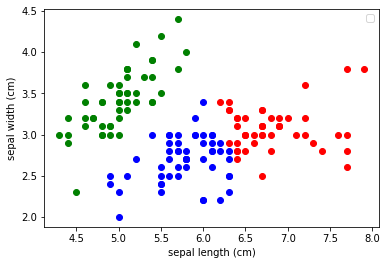

In [26]:
df1 = df[df.cluster == 0]
df2 = df[df.cluster == 1]
df3 = df[df.cluster == 2]

plt.scatter(df1['sepal length (cm)'],df1['sepal width (cm)'], color = 'green')
plt.scatter(df2['sepal length (cm)'],df2['sepal width (cm)'], color = 'red')
plt.scatter(df3['sepal length (cm)'],df3['sepal width (cm)'], color = 'blue')

plt.xlabel('sepal length (cm)')
plt.ylabel('sepal width (cm)')
plt.legend()
#plt.show()

In [27]:
sse = []
k_rng = range(1,10)
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(df)
    sse.append(km.inertia_)

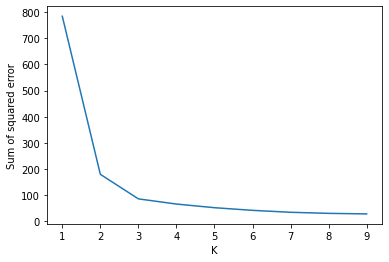

In [28]:

plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_rng,sse)

In [29]:
import seaborn as sns


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


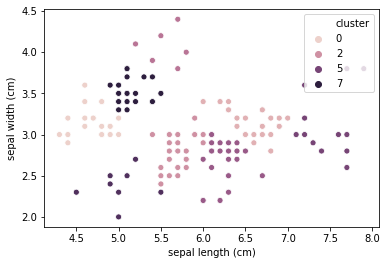

In [37]:
sns.scatterplot(x = df['sepal length (cm)'], y = df['sepal width (cm)'], hue = df['cluster'])

In [33]:
km = KMeans()
km

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=8, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)